<a href="https://colab.research.google.com/github/Shubhi3199/Dog-Breed-Identification/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End to end deep learning model to classify the breed of the dog

## 1. Problem
  The task is to classify a dog image with the correct breed using    deeplearning/ transferlearning 

## 2. Data
  The data is collected from a kaggle competition of predicting the right breed 
  of a dog
  the data consists of:
  * Training Set of `10k+` labeled sample images
  * Test Set of `10k+` images whose label is to be predicted

## 3. Features
  Unstructured data with 120 classifications

## 4. Evaluation
  We need to evaluate the prediction probabilites of our model to classify
  a given dog image with a particular breed label with some accuracy.

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
print(tf.__version__)
print(hub.__version__)
print('GPU available!!' if tf.config.list_physical_devices('GPU') else 'NO GPU available')

2.2.0-rc2
0.7.0
GPU available!!


In [0]:
 #!unzip 'drive/My Drive/Dog Vision/dog-breed-identification.zip' -d 'drive/My Drive/Dog Vision/'

## Getting our Data ready (Turning into Tensors)

It's imoprtant to turn the image data into numeric matrices(tensors).

In [4]:
labels_csv = pd.read_csv('/content/drive/My Drive/Dog Vision/labels.csv')
labels_csv

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [5]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


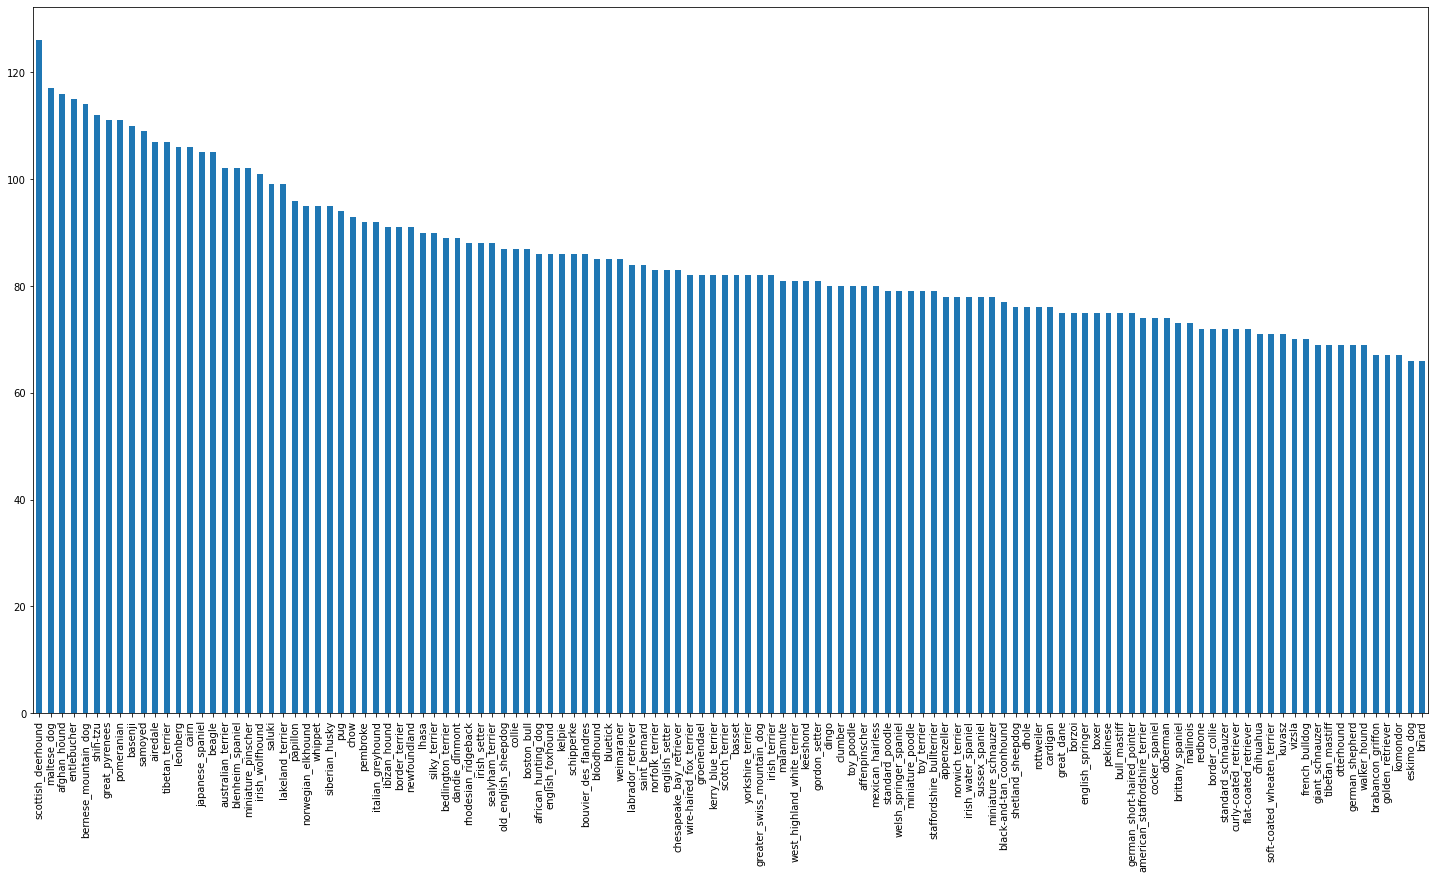

In [6]:
labels_csv['breed'].value_counts().plot.bar(figsize = (25, 13))

In [7]:
labels_csv['breed'].value_counts().median()

82.0

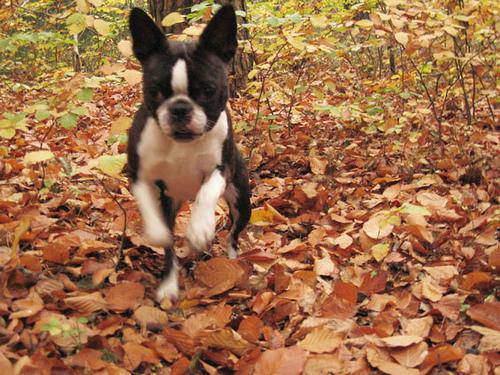

In [8]:
# Let's view an image
from IPython.display import Image
Image('/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [9]:
# Let's get a list of filename of our images
file_names = ['/content/drive/My Drive/Dog Vision/train/' + fname  for fname in labels_csv['id']+ '.jpg' ]
file_names[:10]

['/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
# Check if the no. of image files in the training set matches with the no. of labels given
import os
if len(os.listdir('/content/drive/My Drive/Dog Vision/train')) == len(file_names):
  print('Yes! the number of images match with the labels given!')
else:
  print(':( pls check again')

Yes! the number of images match with the labels given!


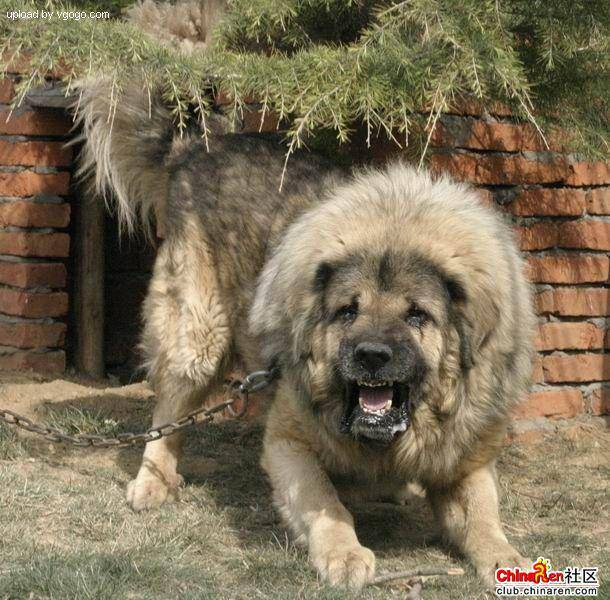

In [11]:
Image(file_names[9000])

In [12]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels, len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

In [13]:
if len(labels) == len(file_names):
  print('YES! the number of labels matches the number of files (images)')
else: print('Oh crap!')

YES! the number of labels matches the number of files (images)


In [14]:
 # Finding the unique labels
 unique_breeds = np.unique(labels)
 unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [15]:
 labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# Turn every label into a boolean array, by comparing each label with unique_breed label
'''
Here we searched in unique_breeds array for each label in all labels array
where element label == element in the unique_breeds array 
''' 
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
# because there were 10222 labels and 120 unique_breeds labels
np.array(boolean_labels).shape

(10222, 120)

In [18]:
# Turning Boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Creating our Own Validation set

In [0]:
# Setup x and y label
x = file_names
y = boolean_labels

In [20]:
np.array(boolean_labels).shape

(10222, 120)

We are going to start off with 1000 images dataset and then go further with more
data and this holds true for all ML/DL projects where you have large datasets

In [0]:
 # set the number of images to use for experimenting
 NUM_IMAGES = 1000 #@param {type: 'slider', min: 1000, max: 10000, step: 100}

In [22]:
# let's split the data into train and validation sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
xTrain, xValid, yTrain, yValid = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2
                                                  )
len(xTrain), len(xValid)

(800, 200)

# Preprocessing images and turning them into Tensors
To preprocess our *image*s into Tensors we're going to write a function which does a few things:

* Take an image filepath as input
* Use TensorFlow to read the file and save it to a variable, image
* Turn our image (a jpg) into Tensors
* Normalize our image (convert color channel values from from 0-255 to 0-1).
* Resize the image to be a shape of (224, 224)
* Return the modified image

In [23]:
# converting an image to a tensor
from matplotlib.pyplot import imread
image = imread(file_names[21])
image.shape

(320, 390, 3)

In [24]:
image[:2]

array([[[ 86,  99,  90],
        [ 87, 100,  91],
        [ 85, 101,  91],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]],

       [[ 81,  94,  85],
        [ 83,  96,  87],
        [ 83,  99,  89],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]]], dtype=uint8)

In [25]:
# converts a numpy array to a tensor
tf.constant(image[:2])

<tf.Tensor: shape=(2, 390, 3), dtype=uint8, numpy=
array([[[ 86,  99,  90],
        [ 87, 100,  91],
        [ 85, 101,  91],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]],

       [[ 81,  94,  85],
        [ 83,  96,  87],
        [ 83,  99,  89],
        ...,
        [ 41,  40,  46],
        [ 41,  40,  46],
        [ 41,  40,  46]]], dtype=uint8)>

In [0]:
# Define image Size
IMG_SIZE = 224

# Creating a function for preprocessing images
def preprocess_image(image_path, img_size = IMG_SIZE):
  '''
  Takes an image image file path and turns the image to a tensor 
  '''
  # Read in an image file, takes the image and converts it into a tensor
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into num tensor with 3 color channels RGB
  image = tf.image.decode_jpeg(image, channels=3) 
  # Normalization, converting color channels values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32) 
  # Resize the image to our desired values (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [0]:
tensor = tf.io.read_file(file_names[34])

In [28]:
tensor = tf.image.decode_jpeg(tensor, channels=3)
tensor[:2]

<tf.Tensor: shape=(2, 594, 3), dtype=uint8, numpy=
array([[[ 22,  25,  30],
        [ 21,  24,  29],
        [ 32,  35,  40],
        ...,
        [206, 199, 183],
        [205, 198, 182],
        [205, 198, 182]],

       [[ 39,  42,  47],
        [ 23,  26,  31],
        [ 36,  39,  44],
        ...,
        [206, 199, 183],
        [205, 198, 182],
        [205, 198, 182]]], dtype=uint8)>

In [29]:
tensor = tf.image.convert_image_dtype(image, tf.float32) 
tensor[:2]

<tf.Tensor: shape=(2, 390, 3), dtype=float32, numpy=
array([[[0.3372549 , 0.38823533, 0.3529412 ],
        [0.34117648, 0.3921569 , 0.35686275],
        [0.33333334, 0.39607847, 0.35686275],
        ...,
        [0.16078432, 0.15686275, 0.18039216],
        [0.16078432, 0.15686275, 0.18039216],
        [0.16078432, 0.15686275, 0.18039216]],

       [[0.31764707, 0.36862746, 0.33333334],
        [0.3254902 , 0.37647063, 0.34117648],
        [0.3254902 , 0.38823533, 0.34901962],
        ...,
        [0.16078432, 0.15686275, 0.18039216],
        [0.16078432, 0.15686275, 0.18039216],
        [0.16078432, 0.15686275, 0.18039216]]], dtype=float32)>

# Turning our data into Batches
If we are trying to process 10k+ images ina go, they might not all fit in the memory.
So, that's why we fo about 32 (batch size) images at a time.

In order to  use TensorFlow effectively, we need our data in the form of tensor tuples which look like, (image, label)

In [0]:
# Creating a simple func to return (image, label)
def get_image_label(image_path, label):
  '''
  Takes image file path and the associated label as the imput and gives out
  the tuple of the two
  '''
  image = preprocess_image(image_path)
  return image, label

Now we've got a way to turn our data into tuples 

1.   List item
2.   List item

of tensors of the form (image, label),
let's now create our batches

In [0]:
# Defining the batch size (32)
BATCH_SIZE = 32

# Creating a function to turn data into batches
def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  
  '''
  Creates batches of Data out of images x and labels y pairs.
  Shuffles the training data but not validation data
  Also accepts test data as input (without labels)
  '''

  if test_data:
    print('Creating test data batches!')
    # Turn filepaths into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    # Now preprocessing the image and dividing the dataset into batches
    data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is valid dataset, we don't need to dhuffle it:
  elif valid_data:
    print('Creating Valid data batches!')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # if we have training data:
  else:
    print('Creating training data batches!')
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image preprocessing function 
    data = data.shuffle(buffer_size = len(x))

    # Creating tuples (img, label) and also preprocessing the image
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch
    

In [32]:
tf.data.Dataset.from_tensor_slices((tf.constant(x)))

<TensorSliceDataset shapes: (), types: tf.string>

In [33]:
dataset = tf.data.Dataset.range(9) 
dataset = dataset.batch(3) 
list(dataset.as_numpy_iterator())

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8])]

In [34]:
# Create training and validation data batches
train_data = create_data_batches(xTrain, yTrain)
valid_data = create_data_batches(xValid, yValid, valid_data=True)

Creating training data batches!
Creating Valid data batches!


In [35]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
Our Data is in batches but it's hard to understand them right away, so let's visualize it

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [37]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
train_images,train_labels = next(train_data.as_numpy_iterator())

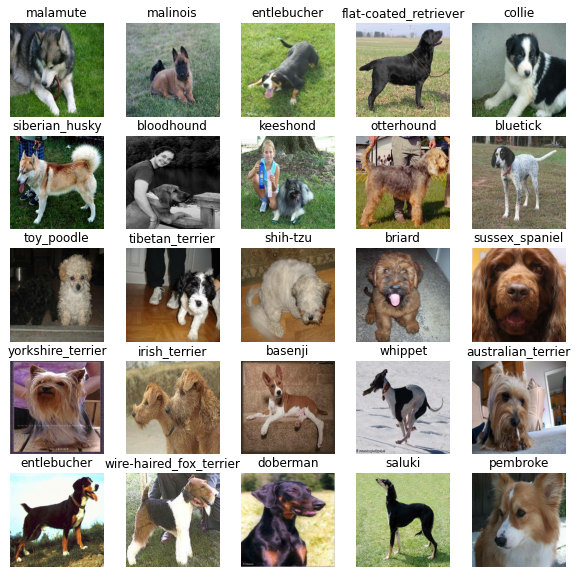

In [39]:
show_25_images(train_images, train_labels)

In [40]:
''''
Here in the boolean_labels 2d array we choose the 1st sub array and found the 
index position at which True was the value that means at that particular index
unique_breed == labels
''' 
boolean_labels[0].argmax()

19

In [41]:
#And here we find out that unique_breed at the 19 index  
unique_breeds[y[0].argmax()]


'boston_bull'

In [42]:
print(len(labels), len(unique_breeds))
print(np.array(boolean_labels).shape)

10222 120
(10222, 120)


In [0]:
df = pd.DataFrame(np.array(boolean_labels), columns = [unique_breeds], index = [labels])

In [44]:
df

affenpinscher  ... yorkshire_terrier
boston_bull                      False  ...             False
dingo                            False  ...             False
pekinese                         False  ...             False
bluetick                         False  ...             False
golden_retriever                 False  ...             False
...                                ...  ...               ...
borzoi                           False  ...             False
dandie_dinmont                   False  ...             False
airedale                         False  ...             False
miniature_pinscher               False  ...             False
chesapeake_bay_retriever         False  ...             False

[10222 rows x 120 columns]

In [45]:
df.index.value_counts()

(scottish_deerhound,)      126
(maltese_dog,)             117
(afghan_hound,)            116
(entlebucher,)             115
(bernese_mountain_dog,)    114
                          ... 
(golden_retriever,)         67
(brabancon_griffon,)        67
(komondor,)                 67
(eskimo_dog,)               66
(briard,)                   66
Length: 120, dtype: int64

In [46]:
df.columns.is_unique, df.index.is_unique

(True, False)

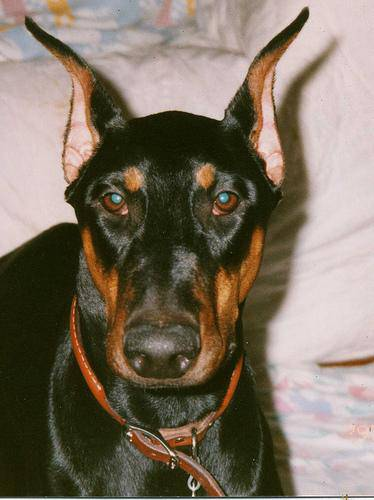

In [47]:
Image(x[9001])


In [48]:
unique_breeds[y[9001].argmax()]

'doberman'

# Building a Model
Before we build a model, few things are to be defined
* The input shape (our image shape, in form of Tensors)
* The output shape (image labells, in form of Tensors)
* The URL of the model we want to use

In [0]:
# Input Shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Output shape
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from Tensorflow hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

Creating a function to build a Keras Deeplearning model! The Function  :
* takes  the input shape, output shape, and the choosen model as parameters
* Defines the layers in a keras model in sequential fashion
* Compiles the model 
* Builds the model (tells the model the input shaoe it will be getting)
* Returs the model

In [0]:
# Creating the above described function
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):

  # Setup the model layers

  model = tf.keras.Sequential([
                               hub.KerasLayer(MODEL_URL), # Layer 1 (Input layer)
                               tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                                                     activation = 'softmax') # LAyer 2 (Output Layer)
                                                                             # When binary classification - sigmoid, BinaryCrossentropy
                                                                             # when multiclassification - softmax, CategoricalCrossentropy
  ])

  # Compile the model
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy']
               )
  
  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [51]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________



# Creating Callbacks
Callbacks are helper functions a model can use during training to do things such as save its progress, check its progress or stop training early if a model stops improving

We'll create two callbacks, 
* `TensorBoard` - helps us track the models progress
* And another for stopping `overfitting` the model 

## TensorBoard Callback
To setup a tensorBoard callback, 3 things to be done - 

1. Load the TensorBoard notebook extension
2. Create a TensorBoard Callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize our models training logs with the `%tensorboard` magic function (After model training)



In [0]:
# Loading the tensorboard notebook extension
%load_ext tensorboard

In [0]:
import datetime

# Create a function  to build a TensorBoard Callback
def create_tensorboard_callback():
  # Create a log directory for storing TensoBoard Logs
  logdir = os.path.join('/content/drive/My Drive/Dog Vision/logs', 
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving. 


In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3)

## Training a model (on subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working

In [0]:
NUM_EPOCHS = 100 #@param {type: 'slider', min: 10, max: 100, step: 10}

In [56]:
# testing if we are running GPU
print('GPU', 'available(YES!!!)' if tf.config.list_physical_devices("GPU") else 'Naaaa :(')

GPU available(YES!!!)


Let's create a simple function that trains a model

* Create a model using `create_model()`
* Setup TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` on our model passing it the training data, validation data, 
number of epochs to train and the callbacks we would like to use
* Return the model

In [0]:
# Build a function to train and return a trained model
def train_model():

  '''
  function returns  a trained model given a simple model
  '''
  # Create a model
  model = create_model()

  # Create a new TensoBoard session every time we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = valid_data,
            validation_frequency = 1,
            callbacks = [tensorboard, early_stopping])
  
  # returned the fitted model
  return model

In [58]:
# Fit the model to the data
  model = train_model()

Epoch 1/100
25/25 [==============================] - 380s 15s/step - loss: 4.6611 - accuracy: 0.0887 - val_loss: 3.4235 - val_accuracy: 0.2150
Epoch 2/100
25/25 [==============================] - 4s 179ms/step - loss: 1.6898 - accuracy: 0.6637 - val_loss: 2.1408 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 4s 179ms/step - loss: 0.5946 - accuracy: 0.9275 - val_loss: 1.6239 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 4s 179ms/step - loss: 0.2620 - accuracy: 0.9875 - val_loss: 1.4226 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 5s 186ms/step - loss: 0.1506 - accuracy: 0.9975 - val_loss: 1.3656 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 5s 191ms/step - loss: 0.1021 - accuracy: 1.0000 - val_loss: 1.3236 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================] - 5s 180ms/step - loss: 0.0774 - accuracy: 1.0000 - val_loss: 1.2905 - val_accuracy: 0.6650

### Checking the tensorboard logs

The magic function `%tensorboard` will access logs directory to visualize its contents

In [59]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

#### The above tensorboard plot clearly depicts how our model is overfitting, but in the start it's good to even overfit...atleast our model is learning

## Making and evaluating predictions using a trained model 

In [60]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [61]:
# Make predictions on the validation data
# All these predictions lie in (0, 1)
'''
for each of 200 images in valid_data set there is build an array of length 
120 which represents the probability of each breed that our model predicts.  
'''
predictions = model.predict(valid_data, verbose=1)
predictions

7/7 [==============================] - 1s 119ms/step


array([[4.38863784e-03, 6.30590221e-05, 2.54495535e-03, ...,
        1.46066741e-04, 3.67139110e-05, 5.77354198e-03],
       [1.19757629e-03, 3.66693101e-04, 1.19810933e-02, ...,
        5.59716136e-04, 4.95024165e-03, 5.67483774e-04],
       [2.23047664e-06, 1.46286038e-04, 1.28593865e-05, ...,
        6.53188617e-05, 1.64930989e-05, 2.89520576e-05],
       ...,
       [5.35051583e-07, 1.64748017e-05, 9.02981355e-06, ...,
        4.44216585e-06, 1.20601733e-04, 1.12533253e-05],
       [2.88996915e-03, 1.51343978e-04, 1.39885437e-04, ...,
        1.41223441e-04, 2.33719857e-05, 2.70230533e-03],
       [1.47098428e-04, 5.71290657e-05, 8.06028256e-04, ...,
        1.46064507e-02, 2.99718929e-04, 5.74975449e-04]], dtype=float32)

In [62]:
 predictions.shape

(200, 120)

In [63]:
# Create function to make predictions:
def predict_breed(index):

  print(f'Max Probability of prediction: {np.max(predictions[index])}')
  print(f'sum: {np.sum(predictions[index])}')
  print(f'Max Index: {predictions[index].argmax()}')
  print(f'Predicted Breed: {unique_breeds[predictions[index].argmax()]}')

predict_breed(0)

Max Probability of prediction: 0.3151702582836151
sum: 1.0
Max Index: 17
Predicted Breed: border_terrier


In [64]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'brittany_spaniel'

 Since  ur validation data is a batch dataset, we'll have to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels 

In [65]:
images_ = [] 
labels_ = []

for image, label in valid_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0]


array([[[0.29599646, 0.43284872, 0.3056691 ],
        [0.26635826, 0.32996926, 0.22846507],
        [0.31428418, 0.2770141 , 0.22934894],
        ...,
        [0.77614343, 0.82320225, 0.8101595 ],
        [0.81291157, 0.8285351 , 0.8406944 ],
        [0.8209297 , 0.8263737 , 0.8423668 ]],

       [[0.2344871 , 0.31603682, 0.19543913],
        [0.3414841 , 0.36560842, 0.27241898],
        [0.45016077, 0.40117094, 0.33964607],
        ...,
        [0.7663987 , 0.8134138 , 0.81350833],
        [0.7304248 , 0.75012016, 0.76590735],
        [0.74518913, 0.76002574, 0.7830809 ]],

       [[0.30157745, 0.3082587 , 0.21018331],
        [0.2905954 , 0.27066195, 0.18401104],
        [0.4138316 , 0.36170745, 0.2964005 ],
        ...,
        [0.79871625, 0.8418535 , 0.8606443 ],
        [0.7957738 , 0.82859945, 0.8605655 ],
        [0.75181633, 0.77904975, 0.8155256 ]],

       ...,

       [[0.9746779 , 0.9878955 , 0.9342279 ],
        [0.99153054, 0.99772066, 0.9427856 ],
        [0.98925114, 0

In [66]:
get_pred_label(labels_[0]), get_pred_label(predictions[0])

('cairn', 'border_terrier')

In [67]:
len(images_)

200

In [68]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(valid_data)
val_labels[0]

'cairn'

In [69]:
len(val_images)

200

Now we have with us,
* prediction labels
* true labels (from valid_data)
* validation images

Creating a function to :
* Takes an array of prediction probabilities, an array of truth labels and and an array of integers
* convert prediction probability to prediction label.
* Plot the predicted label, its probability, truth label, and target image on single plot

In [0]:
def visualize_predictions(prediction_prob_array, true_labels_array, images, n = 1):
  '''
  View the prediction ground truth, and image for sample n
  '''
  pred_probability, true_label, image = prediction_prob_array[n], true_labels_array[n], images[n]

  # Get the pred label


  pred_label = get_pred_label(pred_probability)
  

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # plot the image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the title to - predicted label, probability of predection, and truth label
  plt.title('{} {:2.0f}%  {}'.format(pred_label, 
                                     np.max(pred_probability)*100,
                                     true_label),
                                     color = color)
  




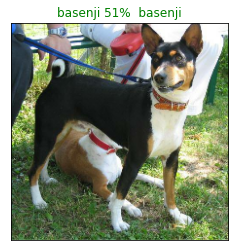

In [71]:
visualize_predictions(prediction_prob_array = predictions, 
                      true_labels_array  = val_labels,
                      images = val_images, n = 171)

### Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predicted labels for a given image.

The function will:
* Take an input of prediction probibilites array, a ground truth array, and an integer
* Find the predictions using `get_pred_label()` 
* Find the top 10:
  * Prediction probabilities indexes
  * predection probabilities labels
  * prediction probabilities values
* Plot the top 10 prediction probability values and labels, colouring the true label green

In [0]:
def plot_pred_conf(prediction_prob_array, true_labels_array, n = 1):
  '''
  Find the top 10 predicted labels along with the truth label and plot them
  '''
  # Taking the input
  pred_probability, true_label = prediction_prob_array[n], true_labels_array[n]

  # Finding the prediction
  pred_label = get_pred_label(pred_probability)

  # Finding the top 10 Prediction probabilities indexes
  top_10_pred_indexes = pred_probability.argsort()[-10:][::-1]

  # Finding the top 10 prediction probabilities values
  top_10_pred_values = pred_probability[top_10_pred_indexes]

  # Finding the top 10 predection probabilities labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
                       top_10_pred_labels,
                       rotation = 'vertical')
  
  # Changing color of the true label
  if np.isin(pred_label, true_labels_array):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else: 
    pass

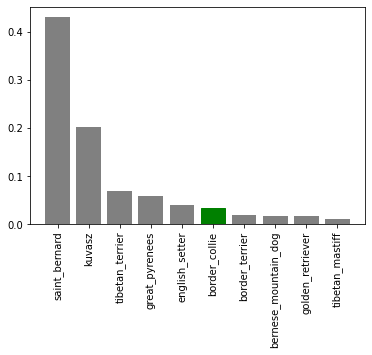

In [73]:
plot_pred_conf(predictions, val_labels, 11)

In [74]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['border_terrier', 'irish_wolfhound', 'dandie_dinmont', 'komondor',
       'soft-coated_wheaten_terrier', 'tibetan_terrier', 'silky_terrier',
       'standard_schnauzer', 'cairn', 'irish_terrier'], dtype=object)

In [75]:
np.max(predictions[0])

0.31517026

Now we've got some functions to help us visualize our predictions and evaluate our model

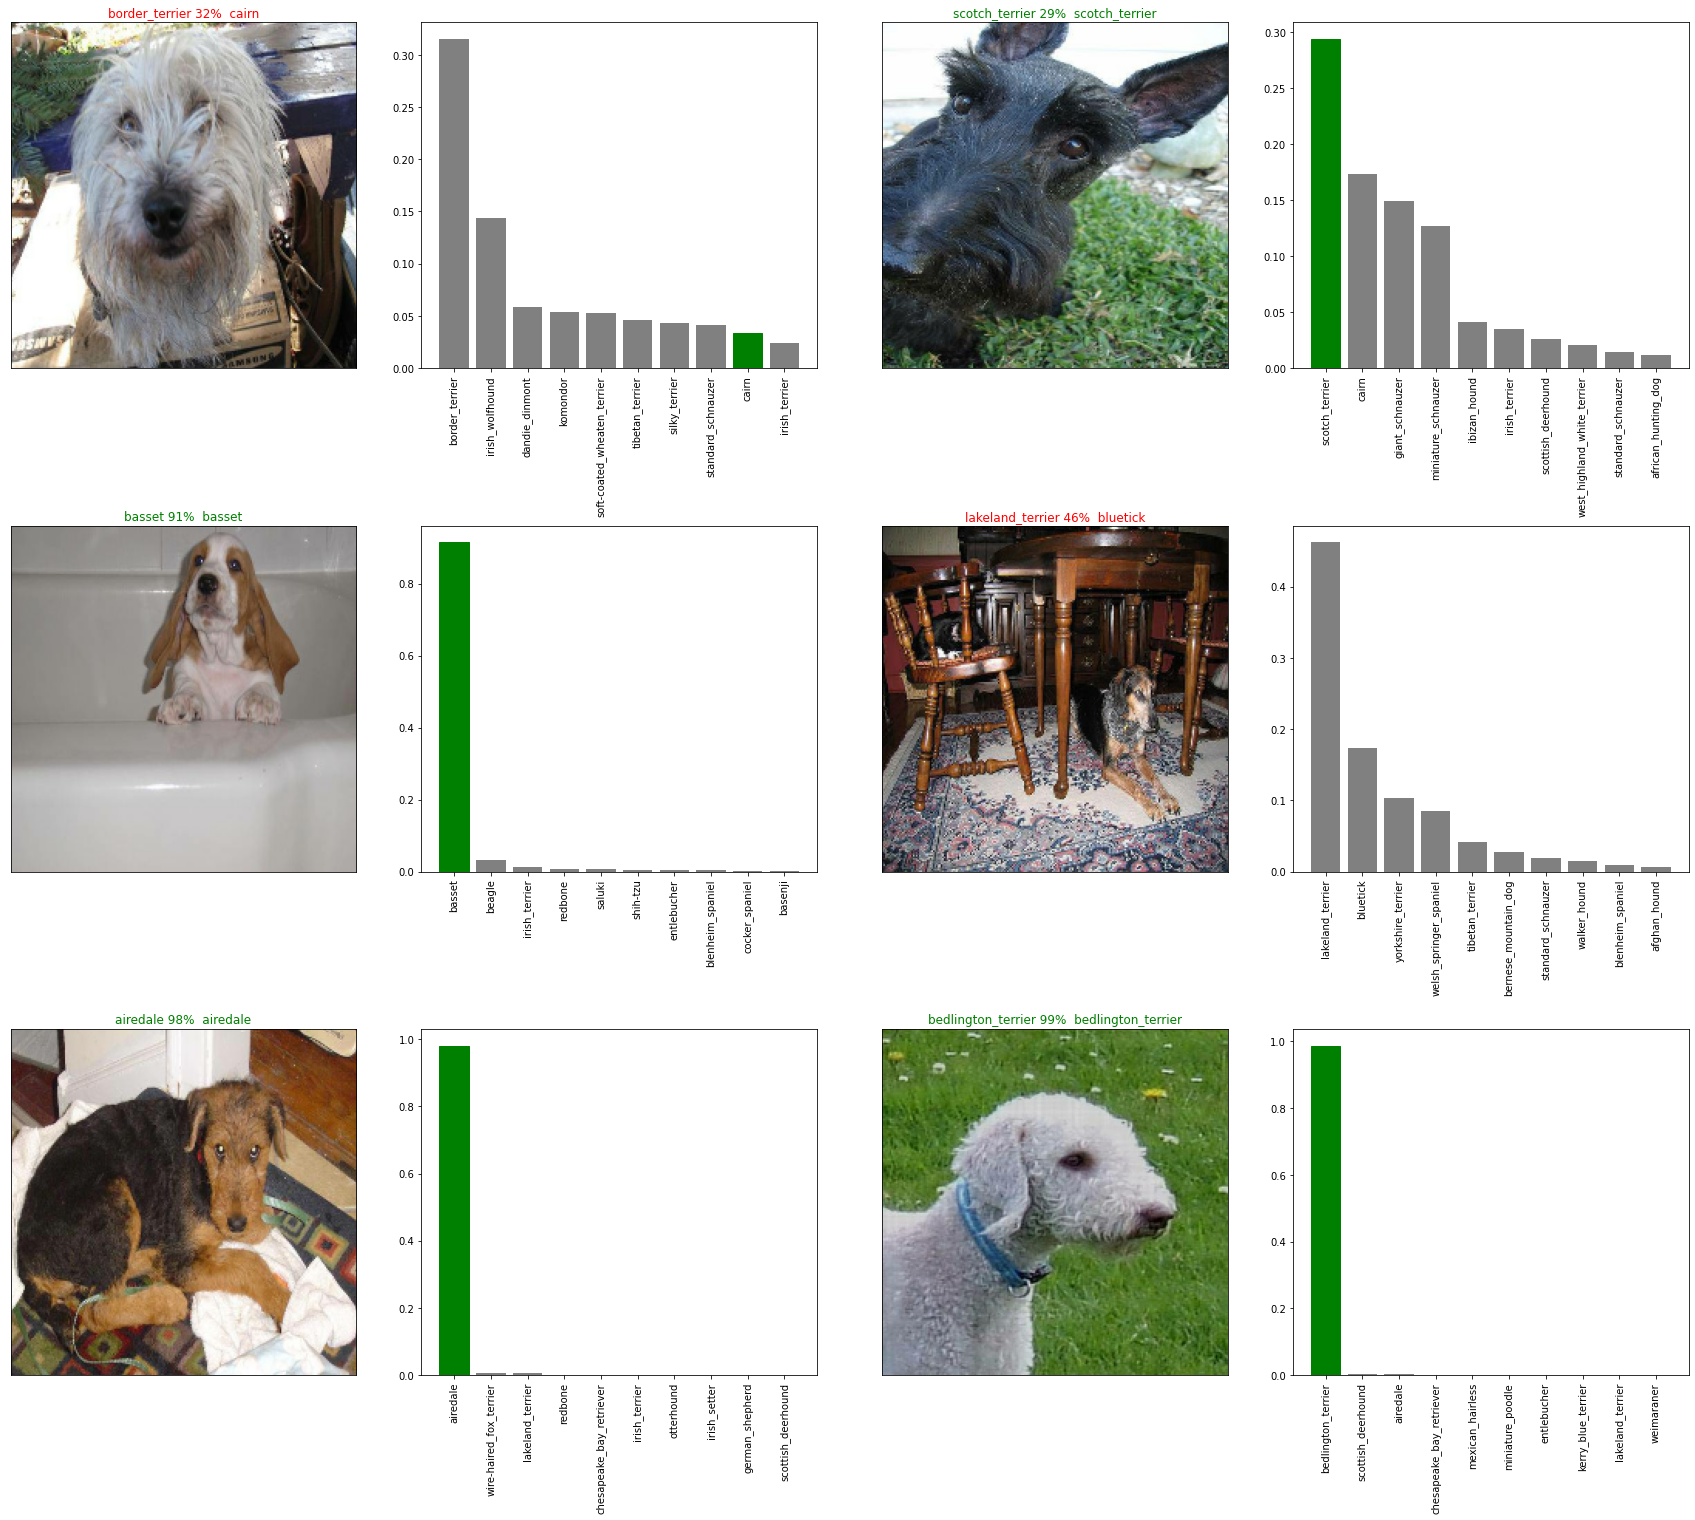

In [89]:
  i_multiplier = 0
  num_rows = 3
  num_columns = 2
  num_images = num_rows*num_columns
  plt.figure(figsize = (12*num_columns, 7*num_rows))
  for i in range(num_images):
    # subplot for the image visualization
    plt.subplot(num_rows, 2*num_columns, 2*i+1)
    visualize_predictions(predictions,
                          val_labels,
                          val_images,
                          i+i_multiplier)
    # subplot for bar graph visualization (top_10)
    plt.subplot(num_rows, 2*num_columns, 2*i+2)
    plot_pred_conf(predictions,
                   val_labels,
                   i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
  plt.show()
